## Project: Visualizing Real World Data - The Price of Women's Shoes

![img](./shoes_pic.jpg)

## Overview


The goal of this project was to practice creating and interpreting different types of visualizations using real world data.

I have chosen to study a dataset of around 19,000 women's shoes and their associated product information. The dataset is the public extract of one of the databases sold by Datafiniti, a database provider for business. The public extract was downloaded from Kaggle.

Each line of the dataset is a pair of shoes sold at a merchant website. It shows name, features, brand, price, merchant and more. Each shoe has an entry for each price found for it so some shoes may have multiple entries.

The dataset used was uploaded at https://www.kaggle.com/datafiniti/womens-shoes-prices?select=7210_1.csv
It is in a .csv format
The codebook for the dataset can be found at https://developer.datafiniti.co/docs/product-data-schema

## Libraries
Pandas and numpy will be needed for the analysis of the data.
Seaborn will be needed for vizualisations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

We have uploaded the dataset from Kaggle. Let's import and assign it to a variable named `shoes_v0`.

In [2]:
#your code here
shoes = pd.read_csv('../data/shoes_v0.csv', low_memory=False)

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like 'shape', `head()`, `info()` and `describe()`. 

**First, use the `shape` method.**

In [3]:
# To check the size of our data, let's use the shape method.
shoes.shape

(19045, 47)

In [4]:
# Let's then print the first 5 rows of our dataset for a first look at the features (columns) and at some of the values.
shoes.head(5) 

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,websiteIDs,weight
0,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
1,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
2,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
3,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
4,AVpfEqFRLJeJML431x7w,NaN,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Brown,NaN,2016-11-16T12:56:36Z,2016-11-16T12:56:36Z,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,NaN,NaN,NaN,"8.5,7,7.5,8",NaN,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,7.63181E+11,NaN,NaN


Comments:

We can see from the first 5 rows that there seems to be a significant number of missing data in some of the columns.

We can also note that some columns seem to be duplicates, at least on the 1st 5 rows. 
- prices.amountMin looks the same as prices.amountMax
- dateAdded looks the same as dateUpdated.

The data in some columns ('descriptions', 'features') column is nested. We'll need to 

Let's start by having a look into this issue to decide if we should drop some columns.

We'll use the info method and the isna() method.

In [5]:
shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19045 entries, 0 to 19044
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19045 non-null  object 
 1   asins                2208 non-null   object 
 2   brand                18412 non-null  object 
 3   categories           19045 non-null  object 
 4   colors               11889 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            19045 non-null  object 
 7   dateUpdated          19045 non-null  object 
 8   descriptions         10780 non-null  object 
 9   dimension            2418 non-null   object 
 10  ean                  9816 non-null   float64
 11  features             14108 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            17840 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 19045 non-null 

**Missing Data**

Comments:
As suspected many columns have null cells. Let's look at the percentage of the empty cells in each columns.

In [6]:
shoes.isna().sum()*100/len(shoes)

id                       0.000000
asins                   88.406406
brand                    3.323707
categories               0.000000
colors                  37.574166
count                  100.000000
dateAdded                0.000000
dateUpdated              0.000000
descriptions            43.397217
dimension               87.303754
ean                     48.458913
features                25.922814
flavors                100.000000
imageURLs                6.327120
isbn                   100.000000
keys                     0.000000
manufacturer            54.549751
manufacturerNumber      16.497768
merchants               28.128118
name                     0.000000
prices.amountMin         0.005251
prices.amountMax         0.000000
prices.availability     99.291153
prices.color            97.127855
prices.condition        35.794172
prices.count            99.963245
prices.currency          0.047256
prices.dateAdded         0.021003
prices.dateSeen          0.021003
prices.flavor 

**Comments:**

Some of the columns are 100% empty or mostly empty. They are the following:
- asins (88% empty) : The Amazon identifier for this product.
- count (100% empty): The number of units included in the product packaging.
- dimension (87% empty): The length, width, and height of the item.
- flavors (100% empty): A list of flavors available for this product.
- isbn (100% empty): The ISBN code for this product.
- prices.availability (close to 100% empty): A true or false if this product is available at this price
- prices.color (97%): The color associated with this price.
- prices.count (close to 100% empty): The number of units being sold at this price.
- prices.flavor (close to 100% empty): The flavor associated with this price.
- prices.ReturnPolicy (96%): The return policy associated with this price.
- prices.shipping (76%): The shipping terms associated with this price.
- prices.size (97%): The size associated with this price.
- prices.source (close to 100% empty): A list of URLs where this price was seen.
- prices.warranty (close to 100% emty): The warranty associated with this price.
- quantities (close to 100% empty): How many units of the product are available from a specific buying source at a given time.
- reviews (95%): A list of reviews for this product.
- websiteIDs (close to 100% empty): A list of identifiers used by the merchant website.
- weight (95%): The weight of this product.

Obviously some of thse columns are just non relevant. It would appear that all Datafiniti databases follow the same exact schema; so all their datasets have empty columns corresponding to those where it made no sense to collect any info. Here are the columns that should not even be in our shoe dataset because they are irrelevant to the shoe business: "flavors", "isbn",  "prices.availability", "prices.flavor", "prices.size".  
Let's drop them. 

Other columns have data that is relevant but not interesting or non-important, such as "asins", "count", "dimension", "weight", "id", "prices.returnPolicy", "prices.shipping", "prices.source", "prices.warranty", "quantities", "reviews", "websiteIDs"... 
Let's drop them as well.

It would have been interesting to study the number of units sold at each price ("prices.count"), but there is just not enough of info about it, so let's drop the column. 

Finally let's drop all the rows that still contain missing data.

In [7]:
shoes.shape

(19045, 47)

In [8]:
shoes.drop(['flavors', 'isbn', 'prices.availability', 'prices.flavor', "prices.size", "asins", "count", "dimension", "prices.color", "prices.returnPolicy", "prices.shipping", "prices.source", "prices.warranty", "quantities", "reviews", "websiteIDs", "weight","prices.count", "categories", "dateAdded", "dateUpdated", "descriptions", "ean", "features", "id", "imageURLs", "keys", "manufacturer", "manufacturerNumber", 'merchants', 'prices.condition', 'prices.dateAdded', 'prices.dateSeen', 'prices.merchant', 'prices.offer', 'prices.sourceURLs', 'sizes', 'skus', 'sourceURLs', 'upc'], axis=1, inplace=True)

In [9]:
# check
shoes.isna().sum()*100/len(shoes)

brand                3.323707
colors              37.574166
name                 0.000000
prices.amountMin     0.005251
prices.amountMax     0.000000
prices.currency      0.047256
prices.isSale        0.031504
dtype: float64

In [10]:
shoes.shape

(19045, 7)

In [11]:
shoes.dropna(inplace = True)

In [12]:
shoes.shape

(11499, 7)

**Redundant Data**

Now let's see if some of the rows are duplicated.

In [13]:
shoes.duplicated().sum()

628

In [14]:
# We have duplicated rows. This is probably a database error, and is less than 3.3% of our data, so let's drop those duplicated rows.
shoes.drop_duplicates(inplace=True)

# check
shoes.duplicated().sum()

0

In [15]:
shoes.shape

(10871, 7)

**Comments:**
Now let's check if the types of each column is what we expect. If all columns have the right type, we will be able to do all the operations that we want to do. 

**Data Types**

In [16]:
shoes.dtypes

brand               object
colors              object
name                object
prices.amountMin    object
prices.amountMax    object
prices.currency     object
prices.isSale       object
dtype: object

**Comments:**
All the columns have a text format. Price columns ("prices.amountMin" and "prices.amountMax") should be numeric. Let's change them.

In [17]:
try:
    shoes['prices.amountMin'].astype('float')
except:
    print("The above code errored out.")

The above code errored out.


**Comments:**
It looks as if there is some text-format data in our price columns. By looking at sample rows we cannot see any text, so there probably isn't a lot of it and in any case it is a dabase error. Let's force our columns to convert to numeric type.

In [18]:
#your code here
shoes['prices.amountMin'] = pd.to_numeric(shoes['prices.amountMin'], errors='coerce')
shoes['prices.amountMax'] = pd.to_numeric(shoes['prices.amountMax'], errors='coerce')

#check
shoes.dtypes

brand                object
colors               object
name                 object
prices.amountMin    float64
prices.amountMax    float64
prices.currency      object
prices.isSale        object
dtype: object

In [19]:
shoes.head()

,brand,colors,name,prices.amountMin,prices.amountMax,prices.currency,prices.isSale
0,Zoot,"Blue,Multicolor",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,71.99,71.99,USD,TRUE
1,Zoot,"Blue,Multicolor",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,250.00,250.00,USD,FALSE
2,Zoot,"Blue,Multicolor",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,75.99,75.99,USD,TRUE
3,Zoot,"Blue,Multicolor",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,79.98,79.98,USD,TRUE
4,Wild Pair,Brown,Wild Pair Colfax Women Peep-toe Synthetic Bro...,26.98,26.98,USD,TRUE


**Getting rid of non-representative rows**

In [20]:
shoes.brand.value_counts()

MUK LUKS       213
Nine West      194
TOMS           191
Nike           188
Easy Spirit    150
              ... 
Remonte          1
Ashworth         1
AvaCostume       1
Tamarac          1
Manitobah        1
Name: brand, Length: 1442, dtype: int64

**Comments:**
We can see that brands are not represented equally in the database. Some have lots of shoes, some very few.
Let's decide to drop the brandnames that have less than 70 shoes in the database.

In [21]:
brands_to_keep = shoes.brand.value_counts()[shoes.brand.value_counts()>70].index
keep = shoes[shoes.brand.isin(brands_to_keep)]
#check
keep.brand.value_counts().nunique()
# Note: We still have the main 20 brands in the dataset, so that's a reasonable number to consider.

20

In [22]:
keep.shape

(2480, 7)

In [23]:
colors_to_keep = keep.colors.value_counts()[keep.colors.value_counts()>50].index
keep = keep[keep.colors.isin(colors_to_keep)]
keep.colors.value_counts().nunique()
# Note: We'll focus on the main 6 colors, which seems interesting enough.

6

In [24]:
keep.shape

(912, 7)

In [25]:
currency_to_keep = keep['prices.currency'].value_counts()[keep['prices.currency'].value_counts()>5].index
keep = keep[keep['prices.currency'].isin(currency_to_keep)]
keep['prices.currency'].value_counts().nunique()

1

**Comments:**
Now that we only have one currency (USD), we can drop the currency column.

In [26]:
keep.drop('prices.currency', axis=1, inplace=True)

In [27]:
keep['prices.isSale'].value_counts()

TRUE     453
FALSE    453
Name: prices.isSale, dtype: int64

Comments: The above column is clean. Either the items are on sale, or they are not.

In [28]:
keep.shape

(906, 6)

In [29]:
#Finally, let's reset the index of our dataset.
keep = keep.reset_index()
keep.head(3)

,index,brand,colors,name,prices.amountMin,prices.amountMax,prices.isSale
0,30,New Balance,Blue,New Balance Pace Women D Round Toe Synthetic B...,42.99,42.99,TRUE
1,31,New Balance,Blue,New Balance Pace Women D Round Toe Synthetic B...,110.00,110.00,FALSE
2,34,Nine West,Red,Nine West Breeze Women Open Toe Canvas Wedge...,13.99,13.99,TRUE


Comments:
    By deleting the rows where we have less than a certain count of data, we have drastically reduced the size of our dataset, making easier to study.

# 2. A deeper look: checking the basic statistics.


In [30]:
keep.describe()

,index,prices.amountMin,prices.amountMax
count,906.000000,906.000000,906.000000
mean,9079.651214,67.525132,67.729525
std,5634.319145,83.570116,83.735956
min,30.000000,0.990000,0.990000
25%,3738.250000,28.617500,28.617500
50%,8898.500000,49.990000,49.990000
75%,14320.750000,84.170000,84.170000
max,18983.000000,1450.000000,1450.000000


**Comments:**

- First we can see that mean and median are not aligned when price is concerned. The mean (68 USD) is much higher than the median (USD 50), which means that we probably have some ouliers at the expensive end.

- The other interesting thing to mention is that we have minimum prices at around 1 USD. We do not have time to investigate further so we will assume it is not an error and keep the data.

 - And finally we can see that the stats are almost the same at minimum and at maximum price. There is no difference between median at min price and median at max price, same for other percentiles. There is only a slight difference at the mean betwwen the 2 columns, but less than 0.2 difference. So I would tend to think that our 2 columns must be the same for the most part. 
Which actually makes sense since each row is a different pair of shoes sold by a merchant. Unless collected over a period where sales occured, it makes sense to consider that there is no max or min price, only a selling price.

Which is why I suggest to drop the 2 column prices that are mostly the same and replace them by a column which will be the median of the two.

In [31]:
col = keep.loc[: , "prices.amountMin":"prices.amountMax"]
keep['MedianPrice'] = col.median(axis=1)
# check
keep.sample()

,index,brand,colors,name,prices.amountMin,prices.amountMax,prices.isSale,MedianPrice
332,6366,VANS,Black,Vans Authentic Round Toe Canvas Skate Shoe,60.0,60.0,FALSE,60.0


In [32]:
keep.drop('prices.amountMax', axis=1, inplace=True)

In [33]:
keep.drop('prices.amountMin', axis=1, inplace=True)

**Boxplot**

Now let's create a boxplot to check for outliers.

<AxesSubplot:xlabel='MedianPrice'>

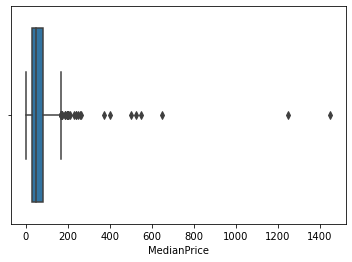

In [34]:
sns.boxplot(data = keep, x= keep.MedianPrice)

**Comments:**

The boxplot method visually confirms that we have outliers in the price column. To manage these outliers, we'll filter our DataFrame take out all the values that have a price higher than the 90th percentile.

In [35]:
#your code here
# Number of outliers by column:
outliers_amount = len(keep)*0.1
print(f'The price 90th percentile is at USD {keep.MedianPrice.quantile(0.9)}. The max price is USD {keep.MedianPrice.max()}, hence about {(keep.MedianPrice.max()/keep.MedianPrice.quantile(0.9)).round(1)} times higher.')
print(f'The number of outliers as defined by the top 10% is {outliers_amount}')

keep = keep[keep.MedianPrice <= keep.MedianPrice.quantile(0.8)]

The price 90th percentile is at USD 129.16500000000002. The max price is USD 1450.0, hence about 11.2 times higher.
The number of outliers as defined by the top 10% is 90.60000000000001


In [36]:
keep.shape

(725, 6)

Now that we have dropped our outliers, let's plot another box plot to double check.

<AxesSubplot:xlabel='MedianPrice'>

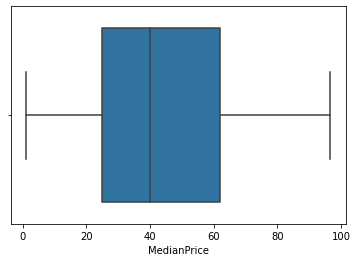

In [37]:
sns.boxplot(data = keep, x= keep.MedianPrice)

We no longer seem to have any outlier.
Finally, let's save our clean data into a new csv named ``shoes_clean``**

In [38]:
#your code here
keep.to_csv('../data/shoes_clean.csv')